## Exploring Rossmann Drug Store Sales Data

In [231]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv('channel_cost_clean.csv', skipinitialspace=True,
                   low_memory=False)

Because we are most interested in the `Date` column that contains the date of sales for each store, we will make sure to process that as a `DateTime` type, and make that the index of our dataframe.

In [232]:
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

data['Year'] = data.index.year
data['Month'] = data.index.month
data['Week'] = data.index.week

In [233]:
print data.head()

            FTAdWords  FTBing  FTEmail  FTEvent  FTFacebook  FTInfluencer  \
Date                                                                        
2016-04-24        NaN     NaN     71.0      NaN       271.0           3.0   
2016-05-01        NaN     NaN      7.0      NaN       912.0           3.0   
2016-05-08        NaN     NaN     21.0      0.0      1621.0          19.0   
2016-05-15        NaN     NaN      9.0      0.0      3398.0          17.0   
2016-05-22        NaN     NaN     26.0      0.0      2306.0          54.0   

            FTInstagram  FTOrganic  FTPartner  FTSnapchat  ...   TwitterConv  \
Date                                                       ...                 
2016-04-24         59.0    11121.0        NaN         NaN  ...          1.00   
2016-05-01        291.0     3311.0        NaN       157.0  ...          0.40   
2016-05-08       1097.0     3434.0        NaN       146.0  ...          0.72   
2016-05-15       1536.0     3678.0        NaN       148.0  .

In [234]:
data.count()

FTAdWords          55
FTBing             43
FTEmail            61
FTEvent            59
FTFacebook         61
FTInfluencer       61
FTInstagram        61
FTOrganic          61
FTPartner          32
FTSnapchat         60
FTTwitter          29
FTYouTube          53
PSAdWords          54
PSBing             19
PSEmail            60
PSEvent            25
PSFacebook         61
PSInfluencer       61
PSInstagram        61
PSOrganic          61
PSPartner           6
PSSnapchat         59
PSTwitter           4
PSYouTube          52
AdWordsSpend       36
BingSpend          13
EmailSpend          0
EventSpend          0
FacebookSpend      46
InfluencerSpend     0
InstagramSpend     46
OrganicSpend        0
PartnerSpend        0
SnapchatSpend      46
TwitterSpend        3
YouTubeSpend       40
AdWordsConv        61
BingConv           61
EmailConv          61
EvenConv           61
FacebookConv       61
InfluencerConv     61
InstagramConv      61
OrganicConv        61
PartnerConv        61
SnapchatCo

In [235]:
data.describe()

FTAdWords     FTBing    FTEmail    FTEvent   FTFacebook  FTInfluencer  \
count   55.000000  43.000000  61.000000  59.000000    61.000000     61.000000   
mean   219.418182   6.372093  10.459016   1.372881  1276.754098    536.032787   
std    163.089125   9.198921  11.420119   2.007729  1109.724420    511.784198   
min      2.000000   0.000000   1.000000   0.000000    74.000000      3.000000   
25%     78.000000   0.000000   3.000000   0.000000   232.000000    179.000000   
50%    203.000000   0.000000   7.000000   1.000000  1231.000000    326.000000   
75%    352.000000  12.500000  12.000000   2.000000  1958.000000    820.000000   
max    659.000000  28.000000  71.000000  12.000000  5052.000000   2191.000000   

        FTInstagram     FTOrganic  FTPartner   FTSnapchat    ...      \
count     61.000000     61.000000  32.000000    60.000000    ...       
mean     934.065574   4149.327869   1.906250   826.350000    ...       
std     1720.611847   1722.882630   8.818453  1235.112783    ...       
min        3.000000   1595.000000   0.000000     1.000000    ...       
25%       36.000000   3266.000000   0.000000    16.500000    ...       
50%      490.000000   3678.000000   0.000000   152.500000    ...       
75%     1043.000000   4808.000000   0.000000  1250.750000    ...       
max    10978.000000  11121.000000  50.000000  5155.000000    ...       

       SnapchatConv  YouTubeConv  CatAdWords  CatFacebook  CatInstagram  \
count     61.000000    61.000000   61.000000    61.000000     61.000000   
mean       0.518852     0.324262    0.131148     0.229508      0.229508   
std        0.279029     0.199628    0.340363     0.424006      0.424006   
min        0.000000     0.000000    0.000000     0.000000      0.000000   
25%        0.380000     0.230000    0.000000     0.000000      0.000000   
50%        0.430000     0.400000    0.000000     0.000000      0.000000   
75%        0.600000     0.460000    0.000000     0.000000      0.000000   
max        1.500000     0.680000    1.000000     1.000000      1.000000   

       CatSnapchat  CatYouTube         Year      Month       Week  
count    61.000000   61.000000    61.000000  61.000000  61.000000  
mean      0.180328    0.131148  2016.409836   6.245902  25.540984  
std       0.387651    0.340363     0.495885   3.254001  14.199265  
min       0.000000    0.000000  2016.000000   1.000000   1.000000  
25%       0.000000    0.000000  2016.000000   4.000000  16.000000  
50%       0.000000    0.000000  2016.000000   6.000000  23.000000  
75%       0.000000    0.000000  2017.000000   9.000000  37.000000  
max       1.000000    1.000000  2017.000000  12.000000  52.000000  

[8 rows x 52 columns]

## Channel: AdWords

        FTAdWords   PSAdWords  AdWordsSpend  AdWordsConv       Week
count   33.000000   33.000000     33.000000    33.000000  33.000000
mean   268.515152  171.575758  15114.333333     0.655758  30.727273
std    144.555811   89.664315  12164.095424     0.129880   8.743829
min     44.000000   39.000000   1563.000000     0.340000  17.000000
25%    173.000000   95.000000   3483.000000     0.610000  23.000000
50%    236.000000  162.000000  10586.000000     0.650000  30.000000
75%    378.000000  243.000000  26153.000000     0.690000  38.000000
max    659.000000  345.000000  40701.000000     0.900000  46.000000


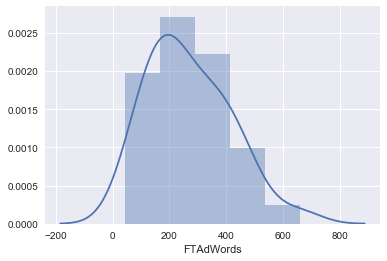

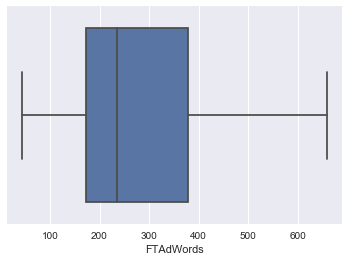

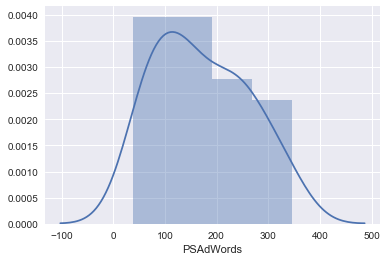

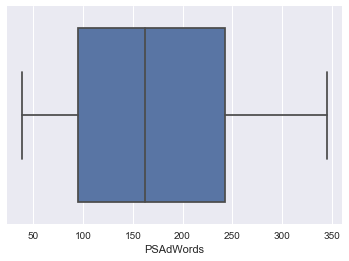

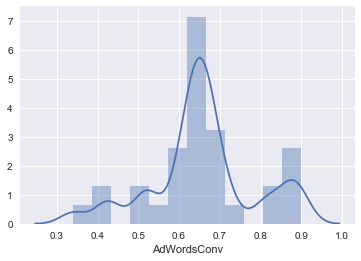

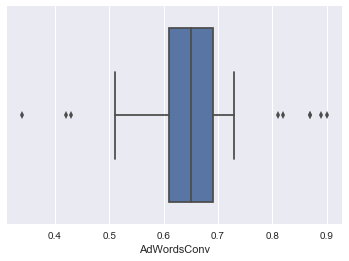

In [236]:
# Create AdWords data frame. Exclude outliers and drop null.
adwords_data = data.ix[:, ['FTAdWords', 'PSAdWords','AdWordsSpend','AdWordsConv','Week']]

adwords_data= adwords_data.loc[adwords_data.FTAdWords < 1200]

adwords_data.dropna()
adwords_nonnull=adwords_data.dropna()
adwords_nonnull.describe()
print (adwords_nonnull.describe())

# Create histogram and box plots
sns.distplot(adwords_nonnull['FTAdWords'])
sns.plt.show()

sns.boxplot(adwords_nonnull['FTAdWords'])
sns.plt.show()

sns.distplot(adwords_nonnull['PSAdWords'])
sns.plt.show()

sns.boxplot(adwords_nonnull['PSAdWords'])
sns.plt.show()

sns.distplot(adwords_nonnull['AdWordsConv'])
sns.plt.show()

sns.boxplot(adwords_nonnull['AdWordsConv'])
sns.plt.show()

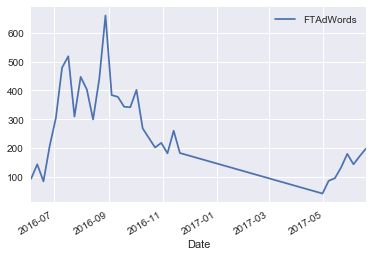

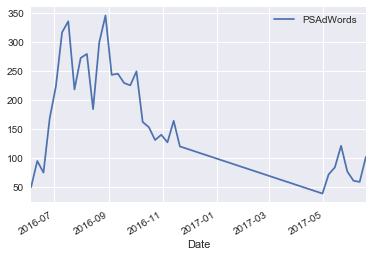

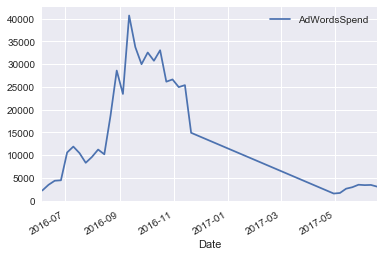

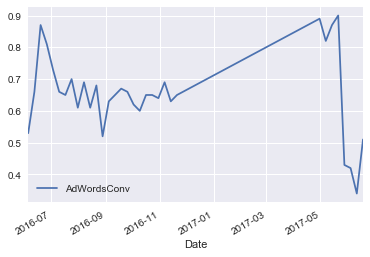

In [237]:
# Create timeframe chart on Adwords Free Trials, Pay subs, Spend, and Converstion rate.
adwords_nonnull[['FTAdWords']].plot()
adwords_nonnull[['PSAdWords']].plot()
adwords_nonnull[['AdWordsSpend']].plot()
adwords_nonnull[['AdWordsConv']].plot()

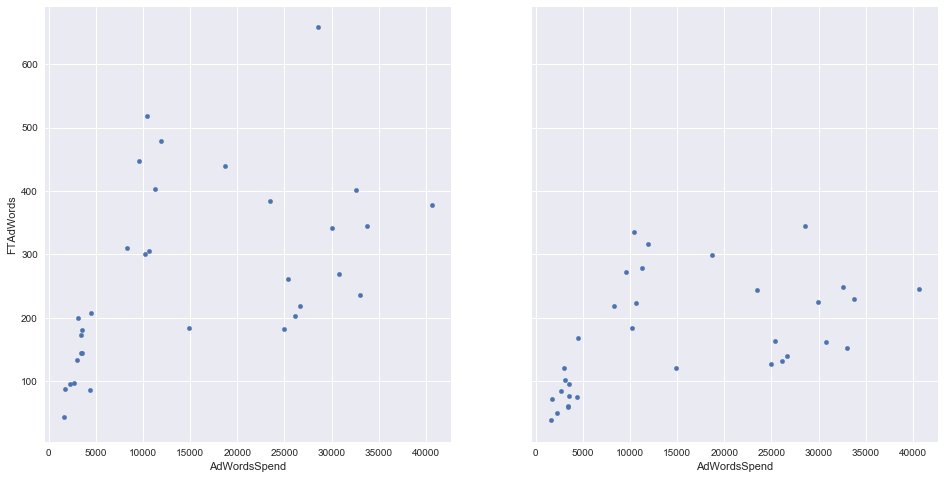

In [238]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 2, sharey=True)
adwords_nonnull.plot(kind='scatter', x='AdWordsSpend', y='FTAdWords', ax=axs[0], figsize=(16, 8))
adwords_nonnull.plot(kind='scatter', x='AdWordsSpend', y='PSAdWords', ax=axs[1])

In [239]:
#Looking At AdWords Spend Effects Free Trials
import statsmodels.formula.api as smf
lm = smf.ols(formula='FTAdWords ~ AdWordsSpend', data=adwords_nonnull).fit()
#print the full summary
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              FTAdWords   R-squared:                       0.242
Model:                            OLS   Adj. R-squared:                  0.218
Method:                 Least Squares   F-statistic:                     9.896
Date:                Mon, 03 Jul 2017   Prob (F-statistic):            0.00364
Time:                        20:56:36   Log-Likelihood:                -205.88
No. Observations:                  33   AIC:                             415.8
Df Residuals:                      31   BIC:                             418.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept      180.1601     35.838      5.027      0.000       107.068   253.252
AdWordsSpend     0.0058      0.002      3.146      0.004         0.002     0.010
==============================================================================
Omnibus:                        6.112   Durbin-Watson:                   0.523
Prob(Omnibus):                  0.047   Jarque-Bera (JB):                5.373
Skew:                           0.988   Prob(JB):                       0.0681
Kurtosis:                       3.035   Cond. No.                     3.10e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.1e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [240]:
#Looking At AdWords Spend Effects Pay Subs
import statsmodels.formula.api as smf
lm = smf.ols(formula='PSAdWords ~ AdWordsSpend', data=adwords_nonnull).fit()
#print the full summary
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              PSAdWords   R-squared:                       0.231
Model:                            OLS   Adj. R-squared:                  0.207
Method:                 Least Squares   F-statistic:                     9.334
Date:                Mon, 03 Jul 2017   Prob (F-statistic):            0.00460
Time:                        20:56:37   Log-Likelihood:                -190.34
No. Observations:                  33   AIC:                             384.7
Df Residuals:                      31   BIC:                             387.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept      117.9798     22.384      5.271      0.000        72.328   163.631
AdWordsSpend     0.0035      0.001      3.055      0.005         0.001     0.006
==============================================================================
Omnibus:                        4.517   Durbin-Watson:                   0.391
Prob(Omnibus):                  0.104   Jarque-Bera (JB):                4.171
Skew:                           0.823   Prob(JB):                        0.124
Kurtosis:                       2.433   Cond. No.                     3.10e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.1e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Channel: Facebook

        FTFacebook   PSFacebook  FacebookSpend  FacebookConv       Week
count    44.000000    44.000000      44.000000     44.000000  44.000000
mean   1492.727273   757.295455   77844.409091      0.515682  27.272727
std     790.869094   432.163060   44533.514016      0.136576  10.634222
min      91.000000    49.000000     843.000000      0.240000  11.000000
25%     975.000000   431.000000   41132.750000      0.437500  18.750000
50%    1582.000000   776.000000   85783.500000      0.500000  24.000000
75%    2108.750000  1036.500000  103491.250000      0.612500  36.250000
max    3398.000000  1774.000000  159965.000000      0.950000  47.000000


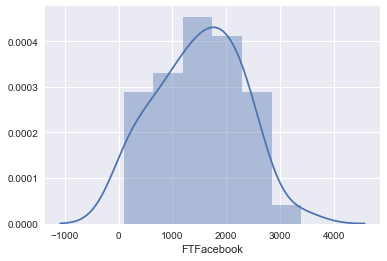

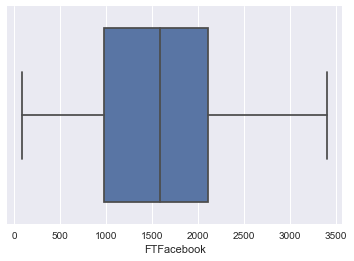

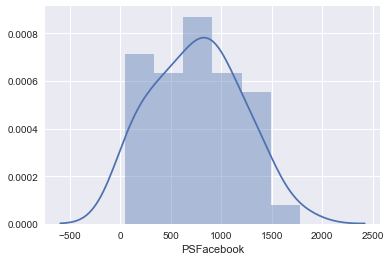

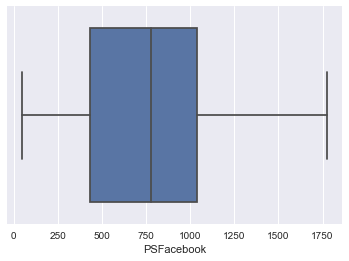

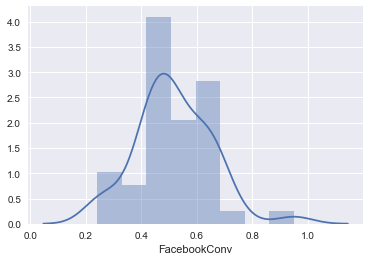

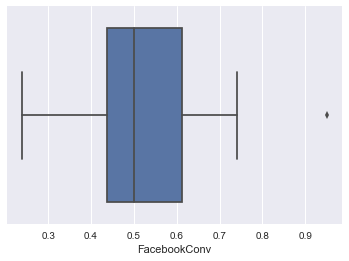

In [241]:
# Create Facebook data frame. Exclude outliers and drop null.
facebook_data = data.ix[:, ['FTFacebook', 'PSFacebook','FacebookSpend', 'FacebookConv','Week']]

facebook_data= facebook_data.loc[facebook_data.FTFacebook < 4000]

facebook_data.dropna()
facebook_nonnull=facebook_data.dropna()
facebook_nonnull.describe()
print (facebook_nonnull.describe())

# Create histogram and box plots
sns.distplot(facebook_nonnull['FTFacebook'])
sns.plt.show()

sns.boxplot(facebook_nonnull['FTFacebook'])
sns.plt.show()

sns.distplot(facebook_nonnull['PSFacebook'])
sns.plt.show()

sns.boxplot(facebook_nonnull['PSFacebook'])
sns.plt.show()

sns.distplot(facebook_nonnull['FacebookConv'])
sns.plt.show()

sns.boxplot(facebook_nonnull['FacebookConv'])
sns.plt.show()

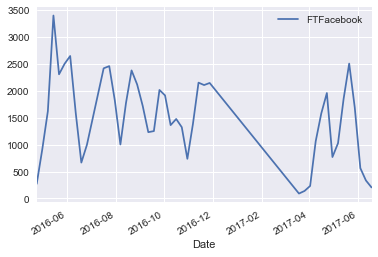

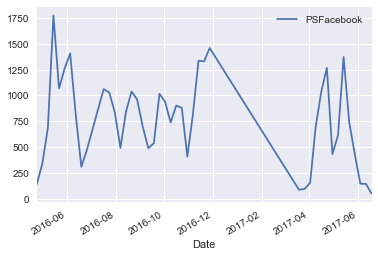

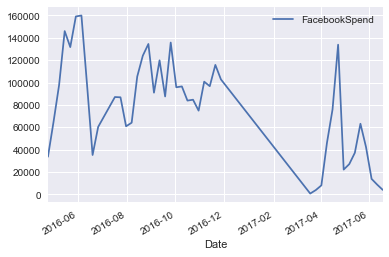

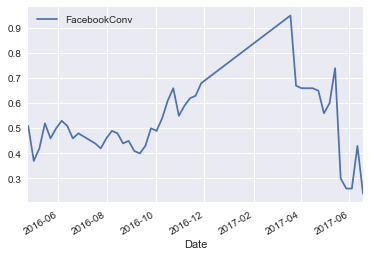

In [242]:
# Create timeframe chart on Adwords Free Trials, Pay subs, Spend, and Converstion rate.
facebook_nonnull[['FTFacebook']].plot()
facebook_nonnull[['PSFacebook']].plot()
facebook_nonnull[['FacebookSpend']].plot()
facebook_nonnull[['FacebookConv']].plot()

In [243]:
#Looking At Facebook Spend Effects Free Trials
import statsmodels.formula.api as smf
lm = smf.ols(formula='FTFacebook ~ FacebookSpend', data=facebook_nonnull).fit()
#print the full summary
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             FTFacebook   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     83.58
Date:                Mon, 03 Jul 2017   Prob (F-statistic):           1.52e-11
Time:                        20:56:42   Log-Likelihood:                -331.45
No. Observations:                  44   AIC:                             666.9
Df Residuals:                      42   BIC:                             670.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept       364.9118    141.723      2.575      0.014        78.902   650.921
FacebookSpend     0.0145      0.002      9.142      0.000         0.011     0.018
==============================================================================
Omnibus:                        6.402   Durbin-Watson:                   1.045
Prob(Omnibus):                  0.041   Jarque-Bera (JB):                5.479
Skew:                           0.847   Prob(JB):                       0.0646
Kurtosis:                       3.344   Cond. No.                     1.82e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.82e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [244]:
#Looking At Facebook Spend Effects Pay Subs
import statsmodels.formula.api as smf
lm = smf.ols(formula='PSFacebook ~ FacebookSpend', data=facebook_nonnull).fit()
#print the full summary
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             PSFacebook   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.604
Method:                 Least Squares   F-statistic:                     66.51
Date:                Mon, 03 Jul 2017   Prob (F-statistic):           3.40e-10
Time:                        20:56:43   Log-Likelihood:                -308.07
No. Observations:                  44   AIC:                             620.1
Df Residuals:                      42   BIC:                             623.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept       165.8813     83.315      1.991      0.053        -2.255   334.017
FacebookSpend     0.0076      0.001      8.155      0.000         0.006     0.009
==============================================================================
Omnibus:                       12.875   Durbin-Watson:                   1.273
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               14.534
Skew:                           1.021   Prob(JB):                     0.000698
Kurtosis:                       4.938   Cond. No.                     1.82e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.82e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

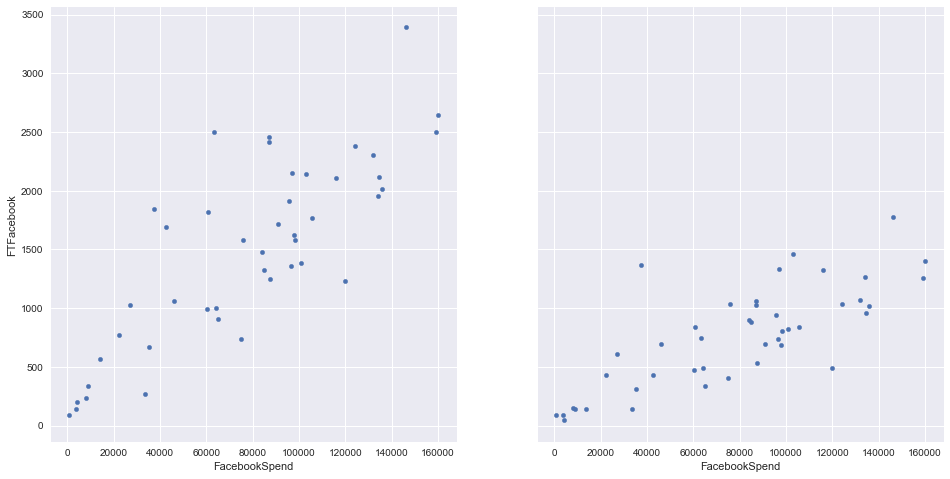

In [214]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 2, sharey=True)
facebook_nonnull.plot(kind='scatter', x='FacebookSpend', y='FTFacebook', ax=axs[0], figsize=(16, 8))
facebook_nonnull.plot(kind='scatter', x='FacebookSpend', y='PSFacebook', ax=axs[1])

## Channel: Instagram

       FTInstagram  PSInstagram  InstagramSpend  InstagramConv       Week
count    41.000000    41.000000       41.000000      41.000000  41.000000
mean    739.000000   303.024390    46738.951220       0.419512  27.268293
std     475.785088   187.414179    32050.828483       0.071062  11.015953
min      10.000000     5.000000      395.000000       0.270000  11.000000
25%     350.000000   123.000000    19864.000000       0.380000  18.000000
50%     790.000000   313.000000    45779.000000       0.410000  23.000000
75%    1043.000000   420.000000    63785.000000       0.470000  37.000000
max    1802.000000   664.000000   126093.000000       0.550000  47.000000


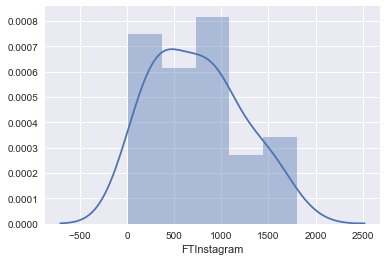

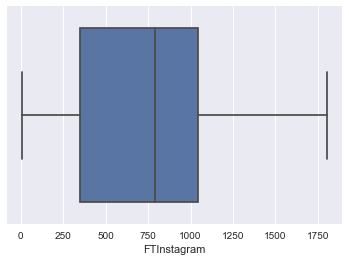

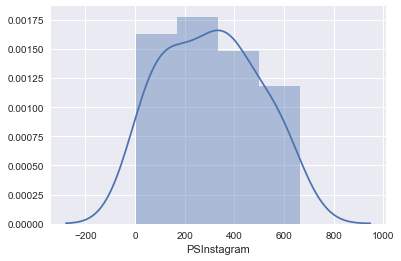

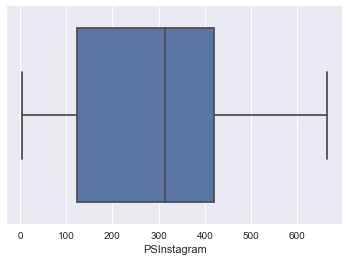

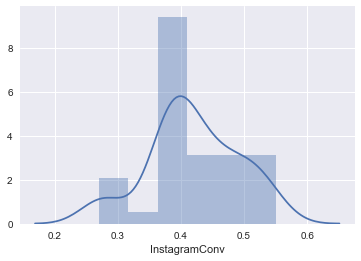

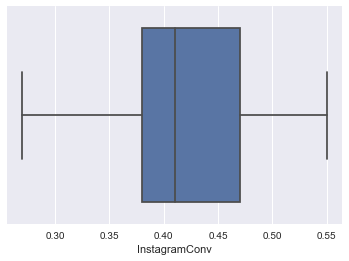

In [215]:
# Create Instagram data frame. Exclude outliers and drop null.
instagram_data = data.ix[:, ['FTInstagram', 'PSInstagram', 'InstagramSpend','InstagramConv', 'Week']]

instagram_data= instagram_data.loc[instagram_data.FTInstagram < 2000]

instagram_data.dropna()
instagram_nonnull=instagram_data.dropna()
instagram_nonnull.describe()
print (instagram_nonnull.describe())

# Create histogram and box plots
sns.distplot(instagram_nonnull['FTInstagram'])
sns.plt.show()

sns.boxplot(instagram_nonnull['FTInstagram'])
sns.plt.show()

sns.distplot(instagram_nonnull['PSInstagram'])
sns.plt.show()

sns.boxplot(instagram_nonnull['PSInstagram'])
sns.plt.show()

sns.distplot(instagram_nonnull['InstagramConv'])
sns.plt.show()

sns.boxplot(instagram_nonnull['InstagramConv'])
sns.plt.show()

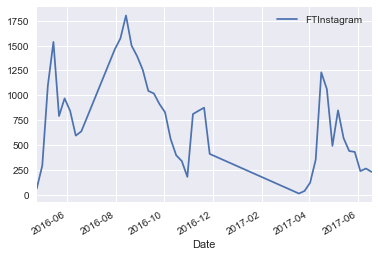

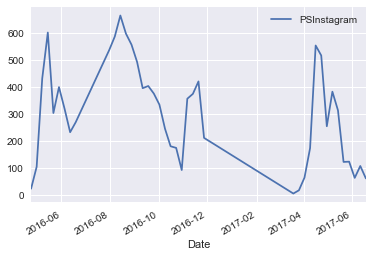

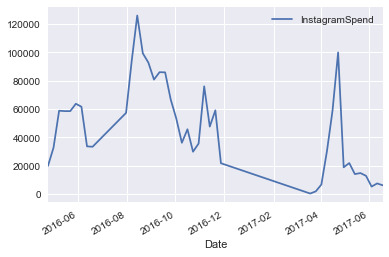

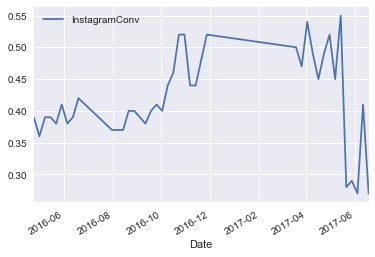

In [245]:
# Create timeframe chart on Adwords Free Trials, Pay subs, Spend, and Converstion rate.
instagram_nonnull[['FTInstagram']].plot()
instagram_nonnull[['PSInstagram']].plot()
instagram_nonnull[['InstagramSpend']].plot()
instagram_nonnull[['InstagramConv']].plot()

In [217]:
#Looking At Instagram Spend Effects Free Trial
import statsmodels.formula.api as smf
lm = smf.ols(formula='FTInstagram ~ InstagramSpend', data=instagram_nonnull).fit()
#print the full summary
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            FTInstagram   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     120.9
Date:                Mon, 03 Jul 2017   Prob (F-statistic):           1.62e-13
Time:                        20:51:29   Log-Likelihood:                -281.51
No. Observations:                  41   AIC:                             567.0
Df Residuals:                      39   BIC:                             570.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept        135.6767     66.265      2.047      0.047         1.642   269.711
InstagramSpend     0.0129      0.001     10.997      0.000         0.011     0.015
==============================================================================
Omnibus:                        5.203   Durbin-Watson:                   1.387
Prob(Omnibus):                  0.074   Jarque-Bera (JB):                3.869
Skew:                           0.667   Prob(JB):                        0.145
Kurtosis:                       3.696   Cond. No.                     1.01e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.01e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [218]:
#Looking At Instagram Spend Effects Pay Subs
import statsmodels.formula.api as smf
lm = smf.ols(formula='PSInstagram ~ InstagramSpend', data=instagram_nonnull).fit()
#print the full summary
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            PSInstagram   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     114.5
Date:                Mon, 03 Jul 2017   Prob (F-statistic):           3.65e-13
Time:                        20:51:30   Log-Likelihood:                -244.15
No. Observations:                  41   AIC:                             492.3
Df Residuals:                      39   BIC:                             495.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept         66.9886     26.645      2.514      0.016        13.094   120.884
InstagramSpend     0.0051      0.000     10.699      0.000         0.004     0.006
==============================================================================
Omnibus:                        5.412   Durbin-Watson:                   1.416
Prob(Omnibus):                  0.067   Jarque-Bera (JB):                4.439
Skew:                           0.794   Prob(JB):                        0.109
Kurtosis:                       3.273   Cond. No.                     1.01e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.01e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

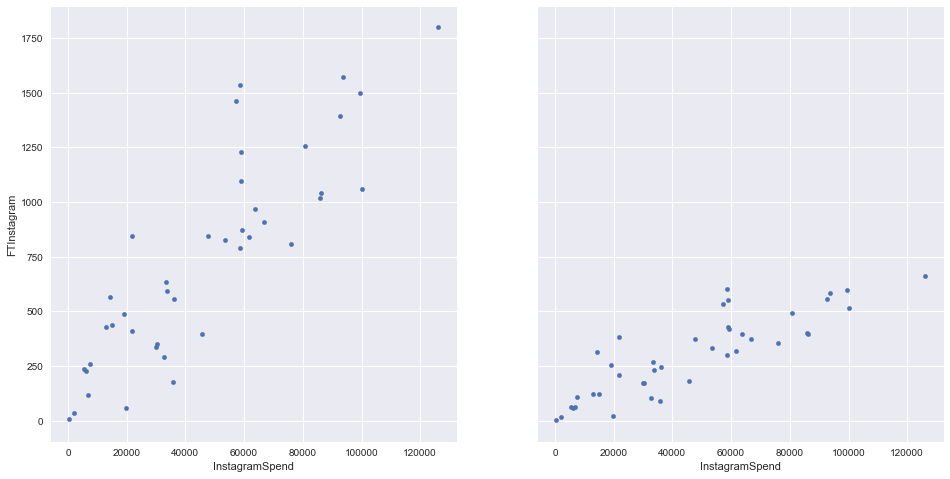

In [219]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 2, sharey=True)
instagram_nonnull.plot(kind='scatter', x='InstagramSpend', y='FTInstagram', ax=axs[0], figsize=(16, 8))
instagram_nonnull.plot(kind='scatter', x='InstagramSpend', y='PSInstagram', ax=axs[1])

## Channel: Snapchat

       FTSnapchat  PSSnapchat  SnapchatSpend  SnapchatConv       Week
count    40.00000    40.00000      40.000000     40.000000  40.000000
mean    721.57500   277.05000   50065.675000      0.447000  28.675000
std     765.17968   291.61372   53264.186887      0.184907  10.351236
min       4.00000     3.00000       0.000000      0.270000  11.000000
25%      68.75000    28.25000       0.000000      0.370000  20.750000
50%     322.00000   146.50000   37805.000000      0.395000  27.500000
75%    1250.75000   513.50000   82750.000000      0.440000  37.250000
max    2232.00000  1016.00000  171361.000000      1.130000  47.000000


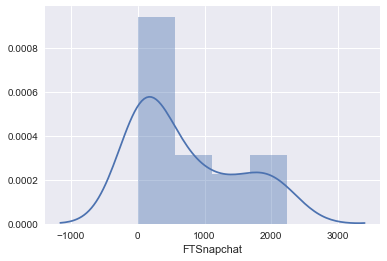

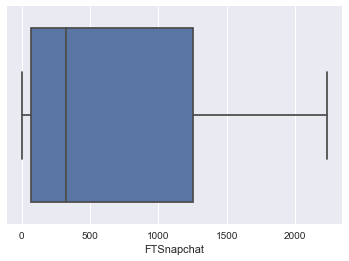

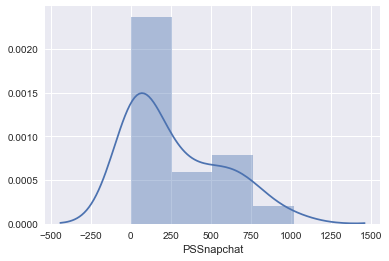

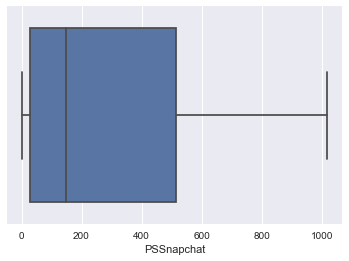

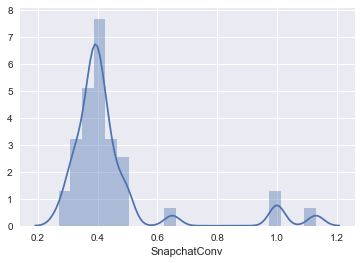

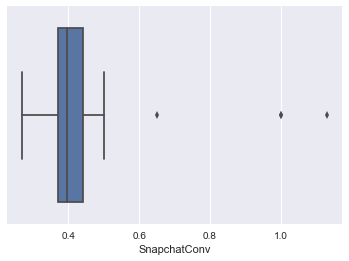

In [220]:
# Create Snapchat data frame. Exclude outliers and drop null.

snapchat_data = data.ix[:, ['FTSnapchat', 'PSSnapchat', 'SnapchatSpend', 'SnapchatConv', 'Week']]

snapchat_data= snapchat_data.loc[snapchat_data.FTSnapchat < 4000]
snapchat_data= snapchat_data.loc[snapchat_data.PSSnapchat < 1200]

snapchat_data.dropna()
snapchat_nonnull=snapchat_data.dropna()
snapchat_nonnull.describe()
print (snapchat_nonnull.describe())

# Create histogram and box plots
sns.distplot(snapchat_nonnull['FTSnapchat'])
sns.plt.show()

sns.boxplot(snapchat_nonnull['FTSnapchat'])
sns.plt.show()

sns.distplot(snapchat_nonnull['PSSnapchat'])
sns.plt.show()

sns.boxplot(snapchat_nonnull['PSSnapchat'])
sns.plt.show()

sns.distplot(snapchat_nonnull['SnapchatConv'])
sns.plt.show()

sns.boxplot(snapchat_nonnull['SnapchatConv'])
sns.plt.show()

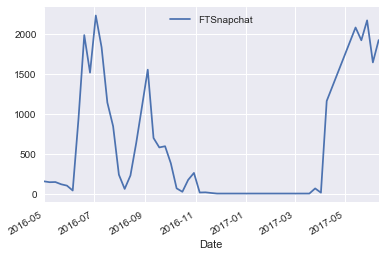

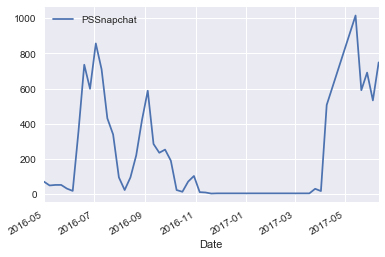

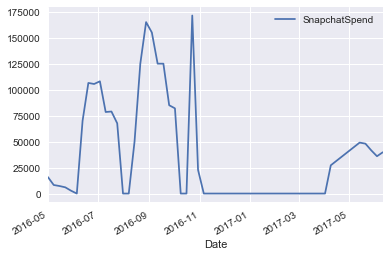

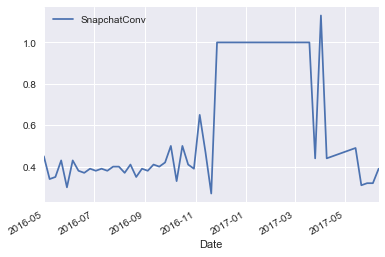

In [221]:
# Create timeframe chart on Adwords Free Trials, Pay subs, Spend, and Converstion rate.
snapchat_nonnull[['FTSnapchat']].plot()
snapchat_nonnull[['PSSnapchat']].plot()
snapchat_nonnull[['SnapchatSpend']].plot()
snapchat_nonnull[['SnapchatConv']].plot()

In [222]:
#Looking At Snapchat Spend Effects Free Trial
import statsmodels.formula.api as smf
lm = smf.ols(formula='FTSnapchat ~ SnapchatSpend', data=snapchat_nonnull).fit()
#print the full summary
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             FTSnapchat   R-squared:                       0.236
Model:                            OLS   Adj. R-squared:                  0.216
Method:                 Least Squares   F-statistic:                     11.75
Date:                Mon, 03 Jul 2017   Prob (F-statistic):            0.00148
Time:                        20:51:44   Log-Likelihood:                -316.47
No. Observations:                  40   AIC:                             636.9
Df Residuals:                      38   BIC:                             640.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept       372.0759    147.898      2.516      0.016        72.672   671.480
SnapchatSpend     0.0070      0.002      3.427      0.001         0.003     0.011
==============================================================================
Omnibus:                        5.117   Durbin-Watson:                   0.424
Prob(Omnibus):                  0.077   Jarque-Bera (JB):                4.640
Skew:                           0.833   Prob(JB):                       0.0983
Kurtosis:                       2.908   Cond. No.                     1.00e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  1e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [223]:
#Looking At Snapchat Spend Effects Pay Subs
import statsmodels.formula.api as smf
lm = smf.ols(formula='PSSnapchat ~ SnapchatSpend', data=snapchat_nonnull).fit()
#print the full summary
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             PSSnapchat   R-squared:                       0.243
Model:                            OLS   Adj. R-squared:                  0.223
Method:                 Least Squares   F-statistic:                     12.17
Date:                Mon, 03 Jul 2017   Prob (F-statistic):            0.00125
Time:                        20:51:45   Log-Likelihood:                -277.71
No. Observations:                  40   AIC:                             559.4
Df Residuals:                      38   BIC:                             562.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept       142.0697     56.129      2.531      0.016        28.442   255.697
SnapchatSpend     0.0027      0.001      3.488      0.001         0.001     0.004
==============================================================================
Omnibus:                        8.255   Durbin-Watson:                   0.554
Prob(Omnibus):                  0.016   Jarque-Bera (JB):                7.152
Skew:                           0.977   Prob(JB):                       0.0280
Kurtosis:                       3.688   Cond. No.                     1.00e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  1e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

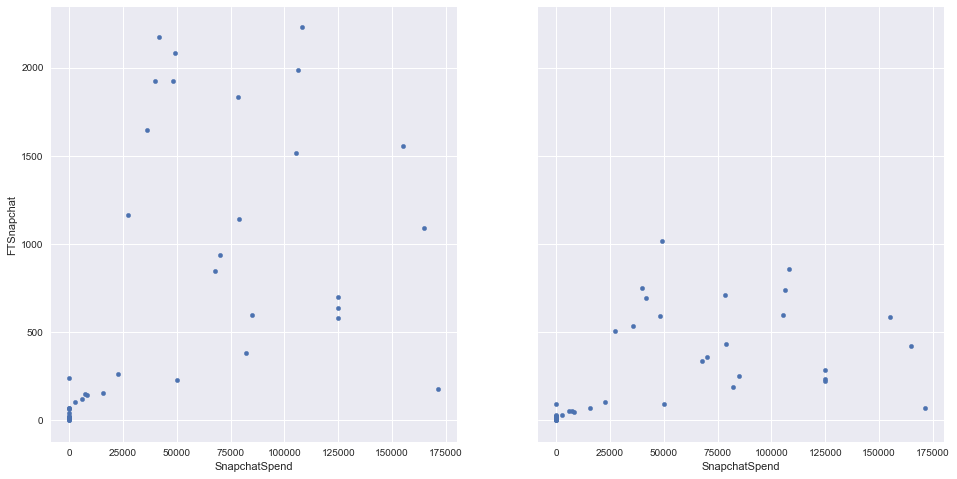

In [224]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 2, sharey=True)
snapchat_nonnull.plot(kind='scatter', x='SnapchatSpend', y='FTSnapchat', ax=axs[0], figsize=(16, 8))
snapchat_nonnull.plot(kind='scatter', x='SnapchatSpend', y='PSSnapchat', ax=axs[1])

## Channel: YouTube

        FTYouTube  PSYouTube  YouTubeSpend       Week
count   25.000000  25.000000     25.000000  25.000000
mean   102.080000  44.600000   5671.560000  37.880000
std     59.165671  25.552234   3563.448378   8.973665
min      0.000000   1.000000    727.000000  17.000000
25%     60.000000  29.000000   2984.000000  32.000000
50%    105.000000  46.000000   4438.000000  38.000000
75%    134.000000  58.000000   8465.000000  45.000000
max    239.000000  99.000000  12905.000000  51.000000


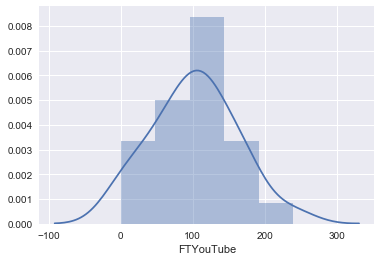

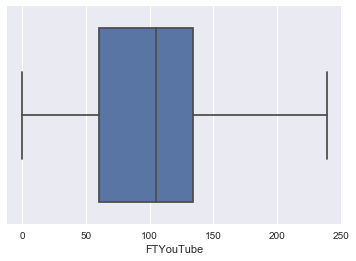

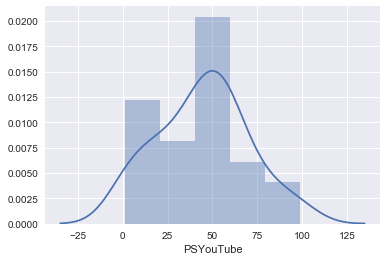

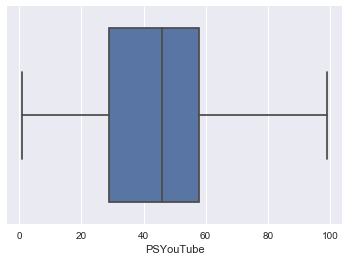

In [225]:
# Create YouTube data frame. Exclude outliers and drop null.

youtube_data = data.ix[:, ['FTYouTube', 'PSYouTube', 'YouTubeSpend', 'Week']]
youtube_data= youtube_data.loc[youtube_data.FTYouTube < 250]
youtube_data= youtube_data.loc[youtube_data.PSYouTube < 200]

youtube_data.dropna()
youtube_nonnull=youtube_data.dropna()
youtube_nonnull.describe()
print (youtube_nonnull.describe())

# Create histogram and box plots
sns.distplot(youtube_nonnull['FTYouTube'])
sns.plt.show()

sns.boxplot(youtube_nonnull['FTYouTube'])
sns.plt.show()

sns.distplot(youtube_nonnull['PSYouTube'])
sns.plt.show()

sns.boxplot(youtube_nonnull['PSYouTube'])
sns.plt.show()

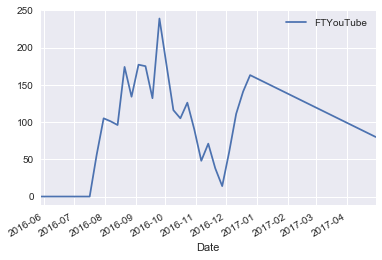

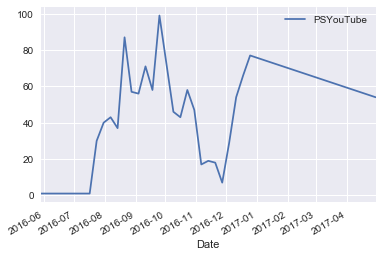

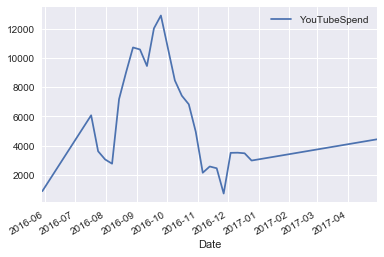

In [226]:
# Create timeframe chart on Adwords Free Trials, Pay subs, Spend, and Converstion rate.
youtube_nonnull[['FTYouTube']].plot()
youtube_nonnull[['PSYouTube']].plot()
youtube_nonnull[['YouTubeSpend']].plot()

In [227]:
#Looking At YouTube Spend Effects Free Trial
import statsmodels.formula.api as smf
lm = smf.ols(formula='FTYouTube ~ YouTubeSpend', data=youtube_nonnull).fit()
#print the full summary
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              FTYouTube   R-squared:                       0.509
Model:                            OLS   Adj. R-squared:                  0.488
Method:                 Least Squares   F-statistic:                     23.86
Date:                Mon, 03 Jul 2017   Prob (F-statistic):           6.20e-05
Time:                        20:51:51   Log-Likelihood:                -128.07
No. Observations:                  25   AIC:                             260.1
Df Residuals:                      23   BIC:                             262.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept       34.8826     16.153      2.159      0.041         1.467    68.298
YouTubeSpend     0.0118      0.002      4.885      0.000         0.007     0.017
==============================================================================
Omnibus:                        1.540   Durbin-Watson:                   1.526
Prob(Omnibus):                  0.463   Jarque-Bera (JB):                0.429
Skew:                          -0.080   Prob(JB):                        0.807
Kurtosis:                       3.622   Cond. No.                     1.27e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.27e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [228]:
#Looking At YouTube Spend Effects Free Trial
import statsmodels.formula.api as smf
lm = smf.ols(formula='PSYouTube ~ YouTubeSpend', data=youtube_nonnull).fit()
#print the full summary
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              PSYouTube   R-squared:                       0.407
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                     15.81
Date:                Mon, 03 Jul 2017   Prob (F-statistic):           0.000597
Time:                        20:51:52   Log-Likelihood:                -109.44
No. Observations:                  25   AIC:                             222.9
Df Residuals:                      23   BIC:                             225.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept       18.6422      7.666      2.432      0.023         2.784    34.500
YouTubeSpend     0.0046      0.001      3.976      0.001         0.002     0.007
==============================================================================
Omnibus:                        0.749   Durbin-Watson:                   1.315
Prob(Omnibus):                  0.687   Jarque-Bera (JB):                0.214
Skew:                           0.221   Prob(JB):                        0.898
Kurtosis:                       3.102   Cond. No.                     1.27e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.27e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

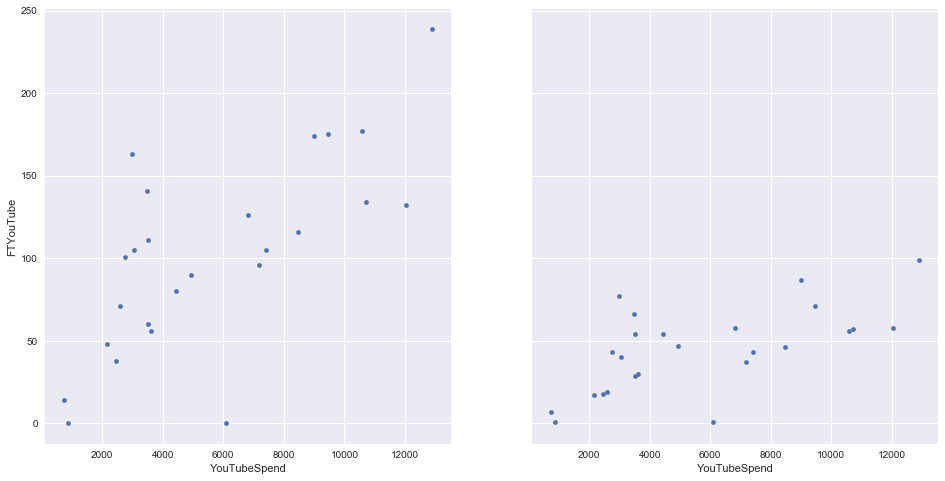

In [229]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 2, sharey=True)
youtube_nonnull.plot(kind='scatter', x='YouTubeSpend', y='FTYouTube', ax=axs[0], figsize=(16, 8))
youtube_nonnull.plot(kind='scatter', x='YouTubeSpend', y='PSYouTube', ax=axs[1])

## All Channels

                FTAdWords  PSAdWords  AdWordsSpend  FTFacebook  PSFacebook  \
FTAdWords        1.000000   0.978586      0.491911    0.401259    0.318441   
PSAdWords        0.978586   1.000000      0.481064    0.393969    0.315367   
AdWordsSpend     0.491911   0.481064      1.000000    0.088797    0.184539   
FTFacebook       0.401259   0.393969      0.088797    1.000000    0.940407   
PSFacebook       0.318441   0.315367      0.184539    0.940407    1.000000   
FacebookSpend    0.523011   0.566052      0.517413    0.727049    0.765493   
FTInstagram      0.350563   0.372192     -0.035464    0.768772    0.616404   
PSInstagram      0.360466   0.381805     -0.019217    0.793085    0.657216   
InstagramSpend   0.593166   0.666441      0.277419    0.718022    0.596227   
FTSnapchat      -0.144161  -0.161339     -0.492440    0.214367    0.191594   
PSSnapchat      -0.162221  -0.153127     -0.456397    0.232831    0.249914   
SnapchatSpend    0.283590   0.308866      0.277605    0.153507  

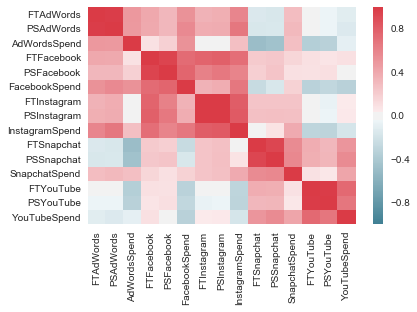

In [230]:
channel_data = data.ix[:, ['FTAdWords', 'PSAdWords','AdWordsSpend','FTFacebook', 'PSFacebook','FacebookSpend', 'FTInstagram', 'PSInstagram', 'InstagramSpend','FTSnapchat', 'PSSnapchat','SnapchatSpend','FTYouTube', 'PSYouTube','YouTubeSpend','Week']]

cmap = sns.diverging_palette(220, 10, as_cmap=True)

correlations = channel_data[['FTAdWords', 'PSAdWords','AdWordsSpend','FTFacebook', 'PSFacebook', 'FacebookSpend','FTInstagram', 'PSInstagram', 'InstagramSpend','FTSnapchat', 'PSSnapchat','SnapchatSpend','FTYouTube', 'PSYouTube','YouTubeSpend']].corr()
print correlations
print sns.heatmap(correlations, cmap=cmap)